In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
# installing a library package for assigning countries to their respective continents
import importlib
import subprocess
import sys

# Check if 'pycountry-convert' is installed
try:
    importlib.import_module('pycountry_convert')
except ImportError:
    # Install the package if not installed
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pycountry-convert'])

In [186]:
# Importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pycountry_convert as pc
from matplotlib.lines import Line2D
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
# Loading necessary datasets for further manipulation
height_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/average-height-by-country-2024.csv')
temperature_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/average-monthly-surface-temperature.csv')
metadata_ds = pd.read_json('/content/drive/MyDrive/Data Projects/Height vs Weather/average-monthly-surface-temperature.metadata.json')
meat_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/meat-supply-per-person.csv')
crop_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/cereal-yield.csv')
gdp_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/gdp-per-capita-worldbank.csv')
freedom_of_expression_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/freedom-of-expression-index.csv')
healthcare_spending_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/healthcare-expenditure-vs-gdp.csv')
women_empowerment_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/women-political-empowerment-index.csv')
population_density_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/population-density.csv')

In [188]:
height_ds.describe(include='all')

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5
count,196,196.000000,196.000000,195.000000,195.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
unique,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,173.111119,160.962586,173.120051,160.971897,167.093862,159.122600,138.523067,139.419614,111.923352,111.289473
std,NaN,4.960571,4.101821,4.971759,4.110302,5.267223,4.059628,5.147848,4.018988,5.133235,3.761384
min,NaN,160.130000,150.910000,160.130000,150.910000,154.150000,149.520000,123.810000,127.450000,96.060000,102.300000
25%,NaN,169.570000,158.177500,169.570000,158.165000,162.595000,156.140000,133.960000,136.197500,107.717500,108.080000
50%,NaN,173.545000,160.660000,173.560000,160.700000,167.375000,159.115000,139.095000,139.390000,112.610000,111.375000
75%,NaN,176.470000,163.925000,176.510000,163.930000,171.242500,162.342500,142.892500,142.852500,115.715000,113.905000


In [189]:
# Function to assign correct continent to the countries
def country_to_continent(country_name):
    try:
        # Get alpha-2 country code
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        # Convert to continent name
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'
height_ds['continent'] = height_ds['country'].apply(country_to_continent)

In [190]:
temperature_ds.describe(include='all')

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
count,198510,198510,198510.000000,198510,198510.000000,198510.000000
unique,195,195,NaN,1018,NaN,NaN
top,Afghanistan,AFG,NaN,1940-01-15,NaN,NaN
freq,1018,1018,NaN,195,NaN,NaN
mean,NaN,NaN,1981.917485,NaN,18.075807,18.075807
std,NaN,NaN,24.489045,NaN,10.243696,8.708166
min,NaN,NaN,1940.000000,NaN,-36.240032,-21.529121
25%,NaN,NaN,1961.000000,NaN,12.313821,10.572247
50%,NaN,NaN,1982.000000,NaN,22.056837,21.861132
75%,NaN,NaN,2003.000000,NaN,25.315705,25.142963


In [191]:
# Calculating mean aurface temperature (1940-2024) of all countries
temperature_ds.columns = ['country', 'Code', 'Year', 'Day', 'average_surface_temp_day', 'average_surface_temp_mean']
temperature_ds = temperature_ds.dropna(subset=['average_surface_temp_day'])
temperature_1940_2024 = temperature_ds.groupby('country')['average_surface_temp_day'].mean().reset_index()
temperature_1940_2024.columns = ['country', 'temp_mean1940_2024']
# Calculating the absolute normalized temperature at 14C (global average) as a measure of how extreme the temperature of the country is compared to global average
temperature_1940_2024['normalized_temp_mean1940_2024'] = (temperature_1940_2024['temp_mean1940_2024'] - 14).abs()

In [192]:
temperature_1940_2024.describe(include='all')

,country,temp_mean1940_2024,normalized_temp_mean1940_2024
count,195,195.000000,195.000000
unique,195,NaN,NaN
top,Afghanistan,NaN,NaN
freq,1,NaN,NaN
mean,NaN,18.075807,8.613162
std,NaN,8.698376,4.217892
min,NaN,-18.867853,0.045499
25%,NaN,10.616896,5.459079
50%,NaN,21.962931,9.044232
75%,NaN,25.098835,11.559906


In [193]:
# Adding the temperature mean and normalized datasets with height dataset
height_tempMeanNorm_ds = height_ds.merge(temperature_1940_2024, on = 'country', how = 'left')

In [194]:
# Creating month and season variables for temperature data
temperature_ds['date'] = pd.to_datetime(temperature_ds['Day'], format='%Y-%m-%d')
temperature_ds['month'] = temperature_ds['date'].dt.month

# Function assignning season to months (Winter: Noverber-March; Summer: April-August)
def label_season(month):
    if month in [10, 11, 12, 1, 2, 3]:
        return 'Winter'
    elif month in [4, 5, 6, 7, 8, 9]:
        return 'Summer'
    else:
        return 'Unknown'

temperature_ds['season'] = temperature_ds['month'].apply(label_season)

# Taking average monthly temperature across 1940-2024 by country
temp_by_month = temperature_ds.groupby(['country', 'month'])['average_surface_temp_day'].mean().reset_index()
temp_by_month.columns = ['country', 'month', 'temp_by_month1940_2024']

# Taking average seasonal temperature across 1940-2024 by country
temp_by_season = temperature_ds.groupby(['country', 'season'])['average_surface_temp_day'].mean().reset_index()
temp_by_season.columns = ['country', 'season', 'temp_by_season1940_2024']
temp_by_month['season'] = temp_by_month['month'].apply(label_season)
temp_month_season = temp_by_month.merge(temp_by_season, on=['country', 'season'], how = 'left')

# Merging the newly created monthly and seasnoal temperature data with other variables
height_tempMeanNormMonthSeason_ds = height_tempMeanNorm_ds.merge(temp_month_season, on = 'country', how = 'left')


In [195]:
# Creating categorical month variable month_categorical
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convert numeric months to categorical labels
height_tempMeanNormMonthSeason_ds['month_categorical'] = height_tempMeanNormMonthSeason_ds['month'].map(month_mapping)

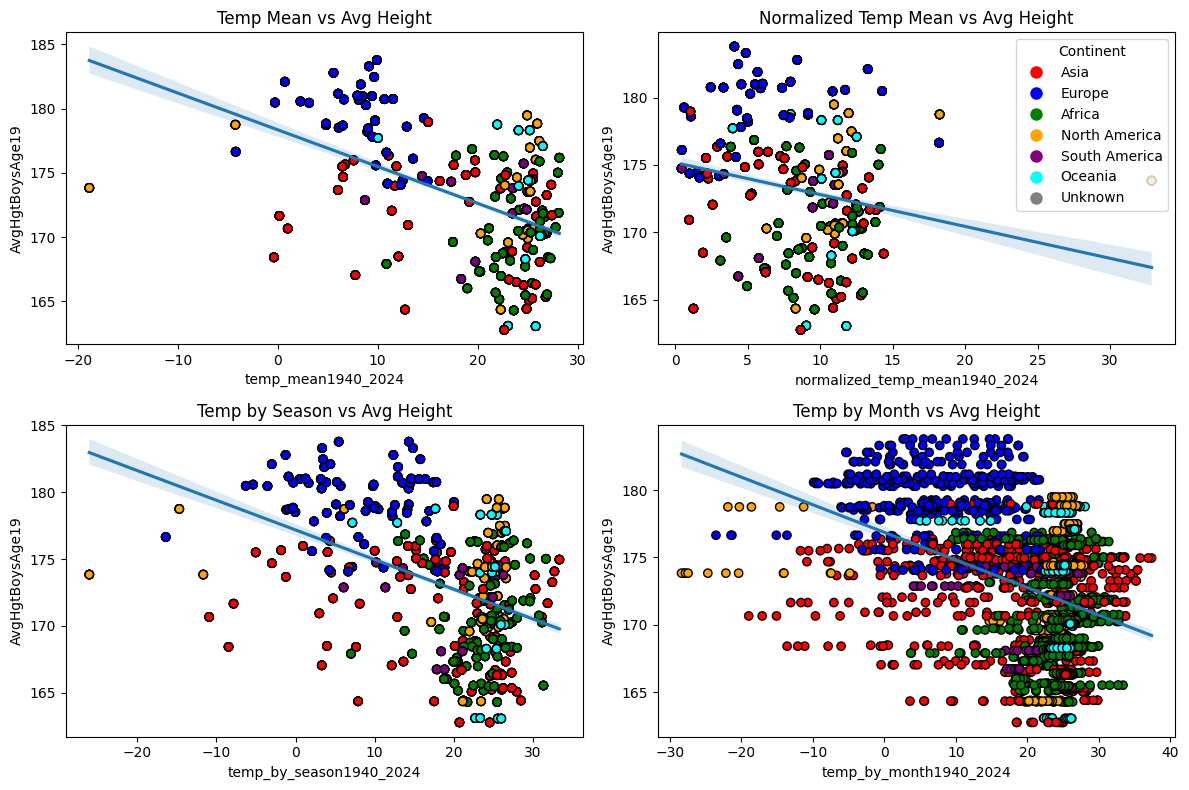

In [196]:
# Define a color mapping for each continent
continent_colors = {
    'Asia': 'red',
    'Europe': 'blue',
    'Africa': 'green',
    'North America': 'orange',
    'South America': 'purple',
    'Oceania': 'cyan',
    'Unknown': 'gray'
}
colors = height_tempMeanNormMonthSeason_ds['continent'].map(continent_colors)

# Plotting the correlation between temperature and height
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# First plot: Mean temperature vs height
sns.regplot(x="temp_mean1940_2024", y="AvgHgtBoysAge19", data=height_tempMeanNormMonthSeason_ds, scatter=False, ax=axes[0, 0])
axes[0, 0].scatter(
    height_tempMeanNormMonthSeason_ds["temp_mean1940_2024"],
    height_tempMeanNormMonthSeason_ds["AvgHgtBoysAge19"],
    c=colors,
    edgecolor='black'
)
axes[0, 0].set_title("Temp Mean vs Avg Height")

# Second plot: Normalized mean temperature vs height
sns.regplot(x="normalized_temp_mean1940_2024", y="AvgHgtBoysAge19", data=height_tempMeanNormMonthSeason_ds, scatter=False, ax=axes[0, 1])
axes[0, 1].scatter(
    height_tempMeanNormMonthSeason_ds["normalized_temp_mean1940_2024"],
    height_tempMeanNormMonthSeason_ds["AvgHgtBoysAge19"],
    c=colors,
    edgecolor='black'
)
axes[0, 1].set_title("Normalized Temp Mean vs Avg Height")

# Third plot: Average Seasonal Temperature vs height
sns.regplot(x="temp_by_season1940_2024", y="AvgHgtBoysAge19", data=height_tempMeanNormMonthSeason_ds, scatter=False, ax=axes[1, 0])
axes[1, 0].scatter(
    height_tempMeanNormMonthSeason_ds["temp_by_season1940_2024"],
    height_tempMeanNormMonthSeason_ds["AvgHgtBoysAge19"],
    c=colors,
    edgecolor='black'
)
axes[1, 0].set_title("Temp by Season vs Avg Height")

# Fourth plot: Average Monthly Temperature vs height
sns.regplot(x="temp_by_month1940_2024", y="AvgHgtBoysAge19", data=height_tempMeanNormMonthSeason_ds, scatter=False, ax=axes[1, 1])
axes[1, 1].scatter(
    height_tempMeanNormMonthSeason_ds["temp_by_month1940_2024"],
    height_tempMeanNormMonthSeason_ds["AvgHgtBoysAge19"],
    c=colors,
    edgecolor='black'
)
axes[1, 1].set_title("Temp by Month vs Avg Height")

# Add legend to the bottom-right plot
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=continent)
                   for continent, color in continent_colors.items()]
axes[0, 1].legend(handles=legend_elements, title="Continent", loc='upper right')

plt.tight_layout()
plt.show()

In [197]:
# Running a linear regression model to check the strength and significance of the correlation (Height~Temperature)
model_ds = height_tempMeanNormMonthSeason_ds.dropna()

X_male = model_ds['temp_mean1940_2024']
Y = model_ds['AvgHgtBoysAge19']

X_male_const = sm.add_constant(X_male)

model_temp_mean = sm.OLS(Y, X_male_const).fit()

print(model_temp_mean.summary())



                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     685.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.02e-130
Time:                        06:04:51   Log-Likelihood:                -5931.9
No. Observations:                2064   AIC:                         1.187e+04
Df Residuals:                    2062   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                178.3545      0

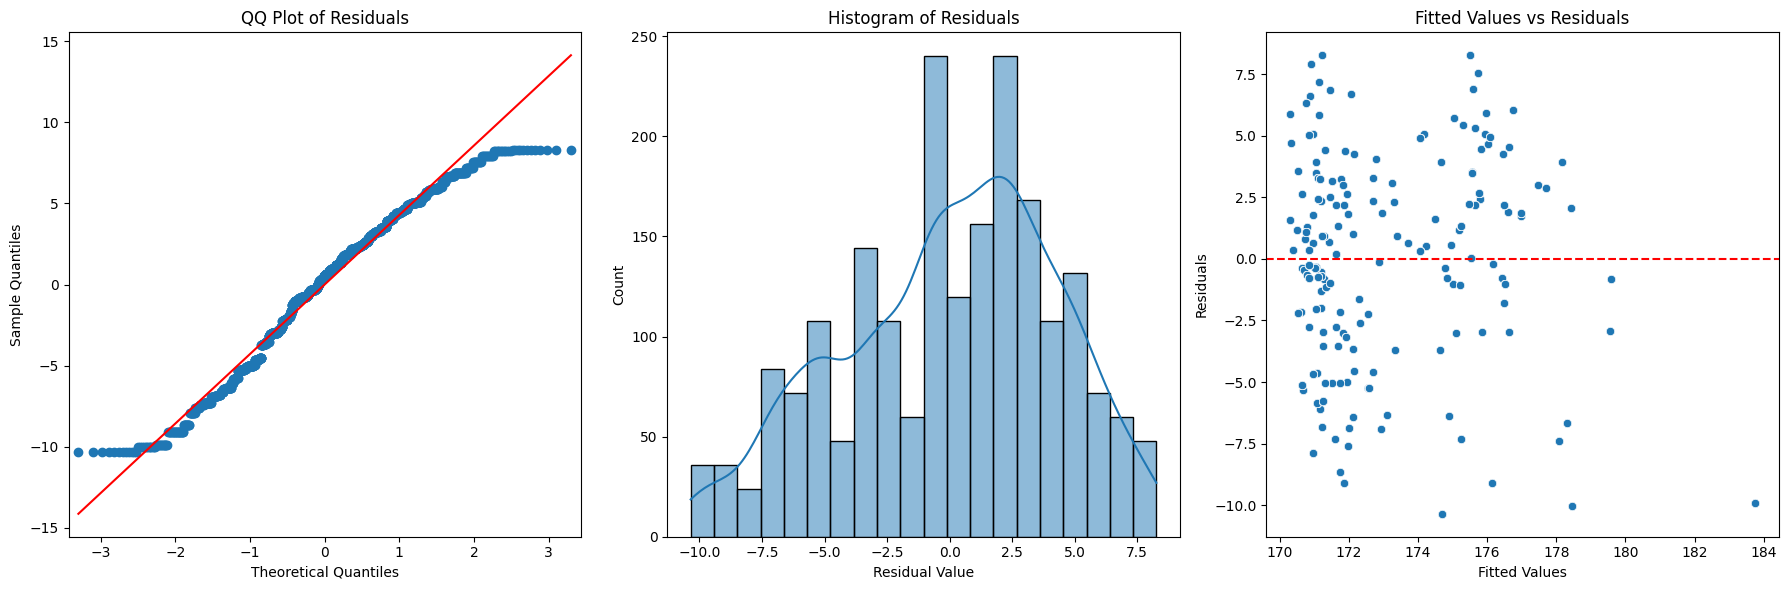

In [209]:
# Assessing the model assumption
residuals = model_temp_mean.resid
fitted_values = model_temp_mean.fittedvalues

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot QQ plot
sm.qqplot(residuals, line='s', ax=axes[0])
axes[0].set_title("QQ Plot of Residuals")

# Plot histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_xlabel("Residual Value")
axes[1].set_title("Histogram of Residuals")

# Plot fitted values vs residuals
sns.scatterplot(x=fitted_values, y=residuals, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_xlabel("Fitted Values")
axes[2].set_ylabel("Residuals")
axes[2].set_title("Fitted Values vs Residuals")

plt.tight_layout()
plt.show()

In [198]:
# Adding the average (1961-2021) meat production per capita by country
meat_ds.columns = ['country', 'Code', 'Year', 'meat_pc_kg']
meat_ds = meat_ds.dropna(subset=['meat_pc_kg'])
meat_1961_2021 = meat_ds.groupby('country')['meat_pc_kg'].mean().reset_index()
meat_1961_2021.columns = ['country', 'meat_pc_kg1961_2021']
height_tempMeanNormMonthSeason_meat_ds = height_tempMeanNormMonthSeason_ds.merge(meat_1961_2021, on='country', how='left')

In [199]:
# Adding the average (1961-2021) cereal crop production per hectare by country
crop_ds.columns = ['country', 'Code', 'Year', 'cereal_per_hectare']
crop_ds = crop_ds.dropna(subset=['cereal_per_hectare'])
crop_1961_2022 = crop_ds.groupby('country')['cereal_per_hectare'].mean().reset_index()
crop_1961_2022.columns = ['country', 'cereal_per_hectare1961_2022']
height_tempMeanNormMonthSeason_meat_crop_ds = height_tempMeanNormMonthSeason_meat_ds.merge(crop_1961_2022, on='country', how='left')

In [200]:
# Adding the average (1990-2022) gdp per capita by country
gdp_ds.columns = ['country', 'Code', 'Year', 'gdp_per_capita']
gdp_ds = gdp_ds.dropna(subset=['gdp_per_capita'])
gdp_1990_2022 = gdp_ds.groupby('country')['gdp_per_capita'].mean().reset_index()
gdp_1990_2022.columns = ['country', 'gdp_per_capita1990_2022']
height_tempMeanNormMonthSeason_meat_crop_gdp_ds = height_tempMeanNormMonthSeason_meat_crop_ds.merge(gdp_1990_2022, on='country', how='left')

In [201]:
# Adding the average (1789-2023) freedom of expression index by country
freedom_of_expression_ds.columns = ['country', 'Code', 'Year', 'freedom_of_expression']
freedom_of_expression_ds = freedom_of_expression_ds.dropna(subset='freedom_of_expression')
freedom_of_expression_1789_2023 = freedom_of_expression_ds.groupby('country')['freedom_of_expression'].mean().reset_index()
freedom_of_expression_1789_2023.columns = ['country', 'freedom_expression_index1789_2023']
height_tempMeanNormMonthSeason_meat_crop_freedom_ds = height_tempMeanNormMonthSeason_meat_crop_gdp_ds.merge(freedom_of_expression_1789_2023, on='country', how='left')

In [205]:
# Adding the average (2000-2021) healthcare expenditure per capita by country
healthcare_spending_ds.columns = ['country', 'Code', 'Year', 'health_expenditure_pc', 'gdp', 'population', 'region']
healthcare_spending_ds = healthcare_spending_ds.dropna(subset=['health_expenditure_pc'])
healthcare_spending_2000_2021 = healthcare_spending_ds.groupby('country')['health_expenditure_pc'].mean().reset_index()
healthcare_spending_2000_2021.columns = ['country', 'health_expenditure_pc2000_2021']
height_tempMeanNormMonthSeason_meat_crop_freedom_health_ds = height_tempMeanNormMonthSeason_meat_crop_freedom_ds.merge(healthcare_spending_2000_2021, on='country', how='left')

In [215]:
# Adding the average (1789-2023) women's political empowerment index by country
women_empowerment_ds.columns = ['country', 'Code', 'Year', 'women_political_empowerment_index']
women_empowerment_ds = women_empowerment_ds.dropna(subset=['women_political_empowerment_index'])
women_empowerment_1789_2023 = women_empowerment_ds.groupby('country')['women_political_empowerment_index'].mean().reset_index()
women_empowerment_1789_2023.columns = ['country', 'women_political_empowerment_index1789_2023']
height_tempMeanNormMonthSeason_meat_crop_freedom_health_women_ds = height_tempMeanNormMonthSeason_meat_crop_freedom_health_ds.merge(women_empowerment_1789_2023, on='country', how='left')

In [223]:
# Adding the average (10000BC-2100) population density by country
population_density_ds.columns = ['country', 'Code', 'Year', 'population_density']
population_density_ds = population_density_ds.dropna(subset=['population_density'])
population_density_10000BC_2100 = population_density_ds.groupby('country')['population_density'].mean().reset_index()
population_density_10000BC_2100.columns = ['country', 'population_density_10000BC_2100']
height_tempMeanNormMonthSeason_meat_crop_freedom_health_women_populationDensity_ds = height_tempMeanNormMonthSeason_meat_crop_freedom_health_women_ds.merge(population_density_10000BC_2100, on='country', how='left')

In [225]:
height_tempMeanNormMonthSeason_meat_crop_freedom_health_women_populationDensity_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     2088 non-null   object 
 1   AverageHeightBoysAge19                      2088 non-null   float64
 2   AverageHeightGirlsAge19                     2088 non-null   float64
 3   AvgHgtBoysAge19                             2087 non-null   float64
 4   AvgHgtGirlsAge19                            2087 non-null   float64
 5   AverageHeightBoysAge15                      2088 non-null   float64
 6   AverageHeightGirlsAge15                     2088 non-null   float64
 7   AverageHeightBoysAge10                      2088 non-null   float64
 8   AverageHeightGirlsAge10                     2088 non-null   float64
 9   AverageHeightBoysAge5                       2088 non-null   float64
 10  AverageHeigh

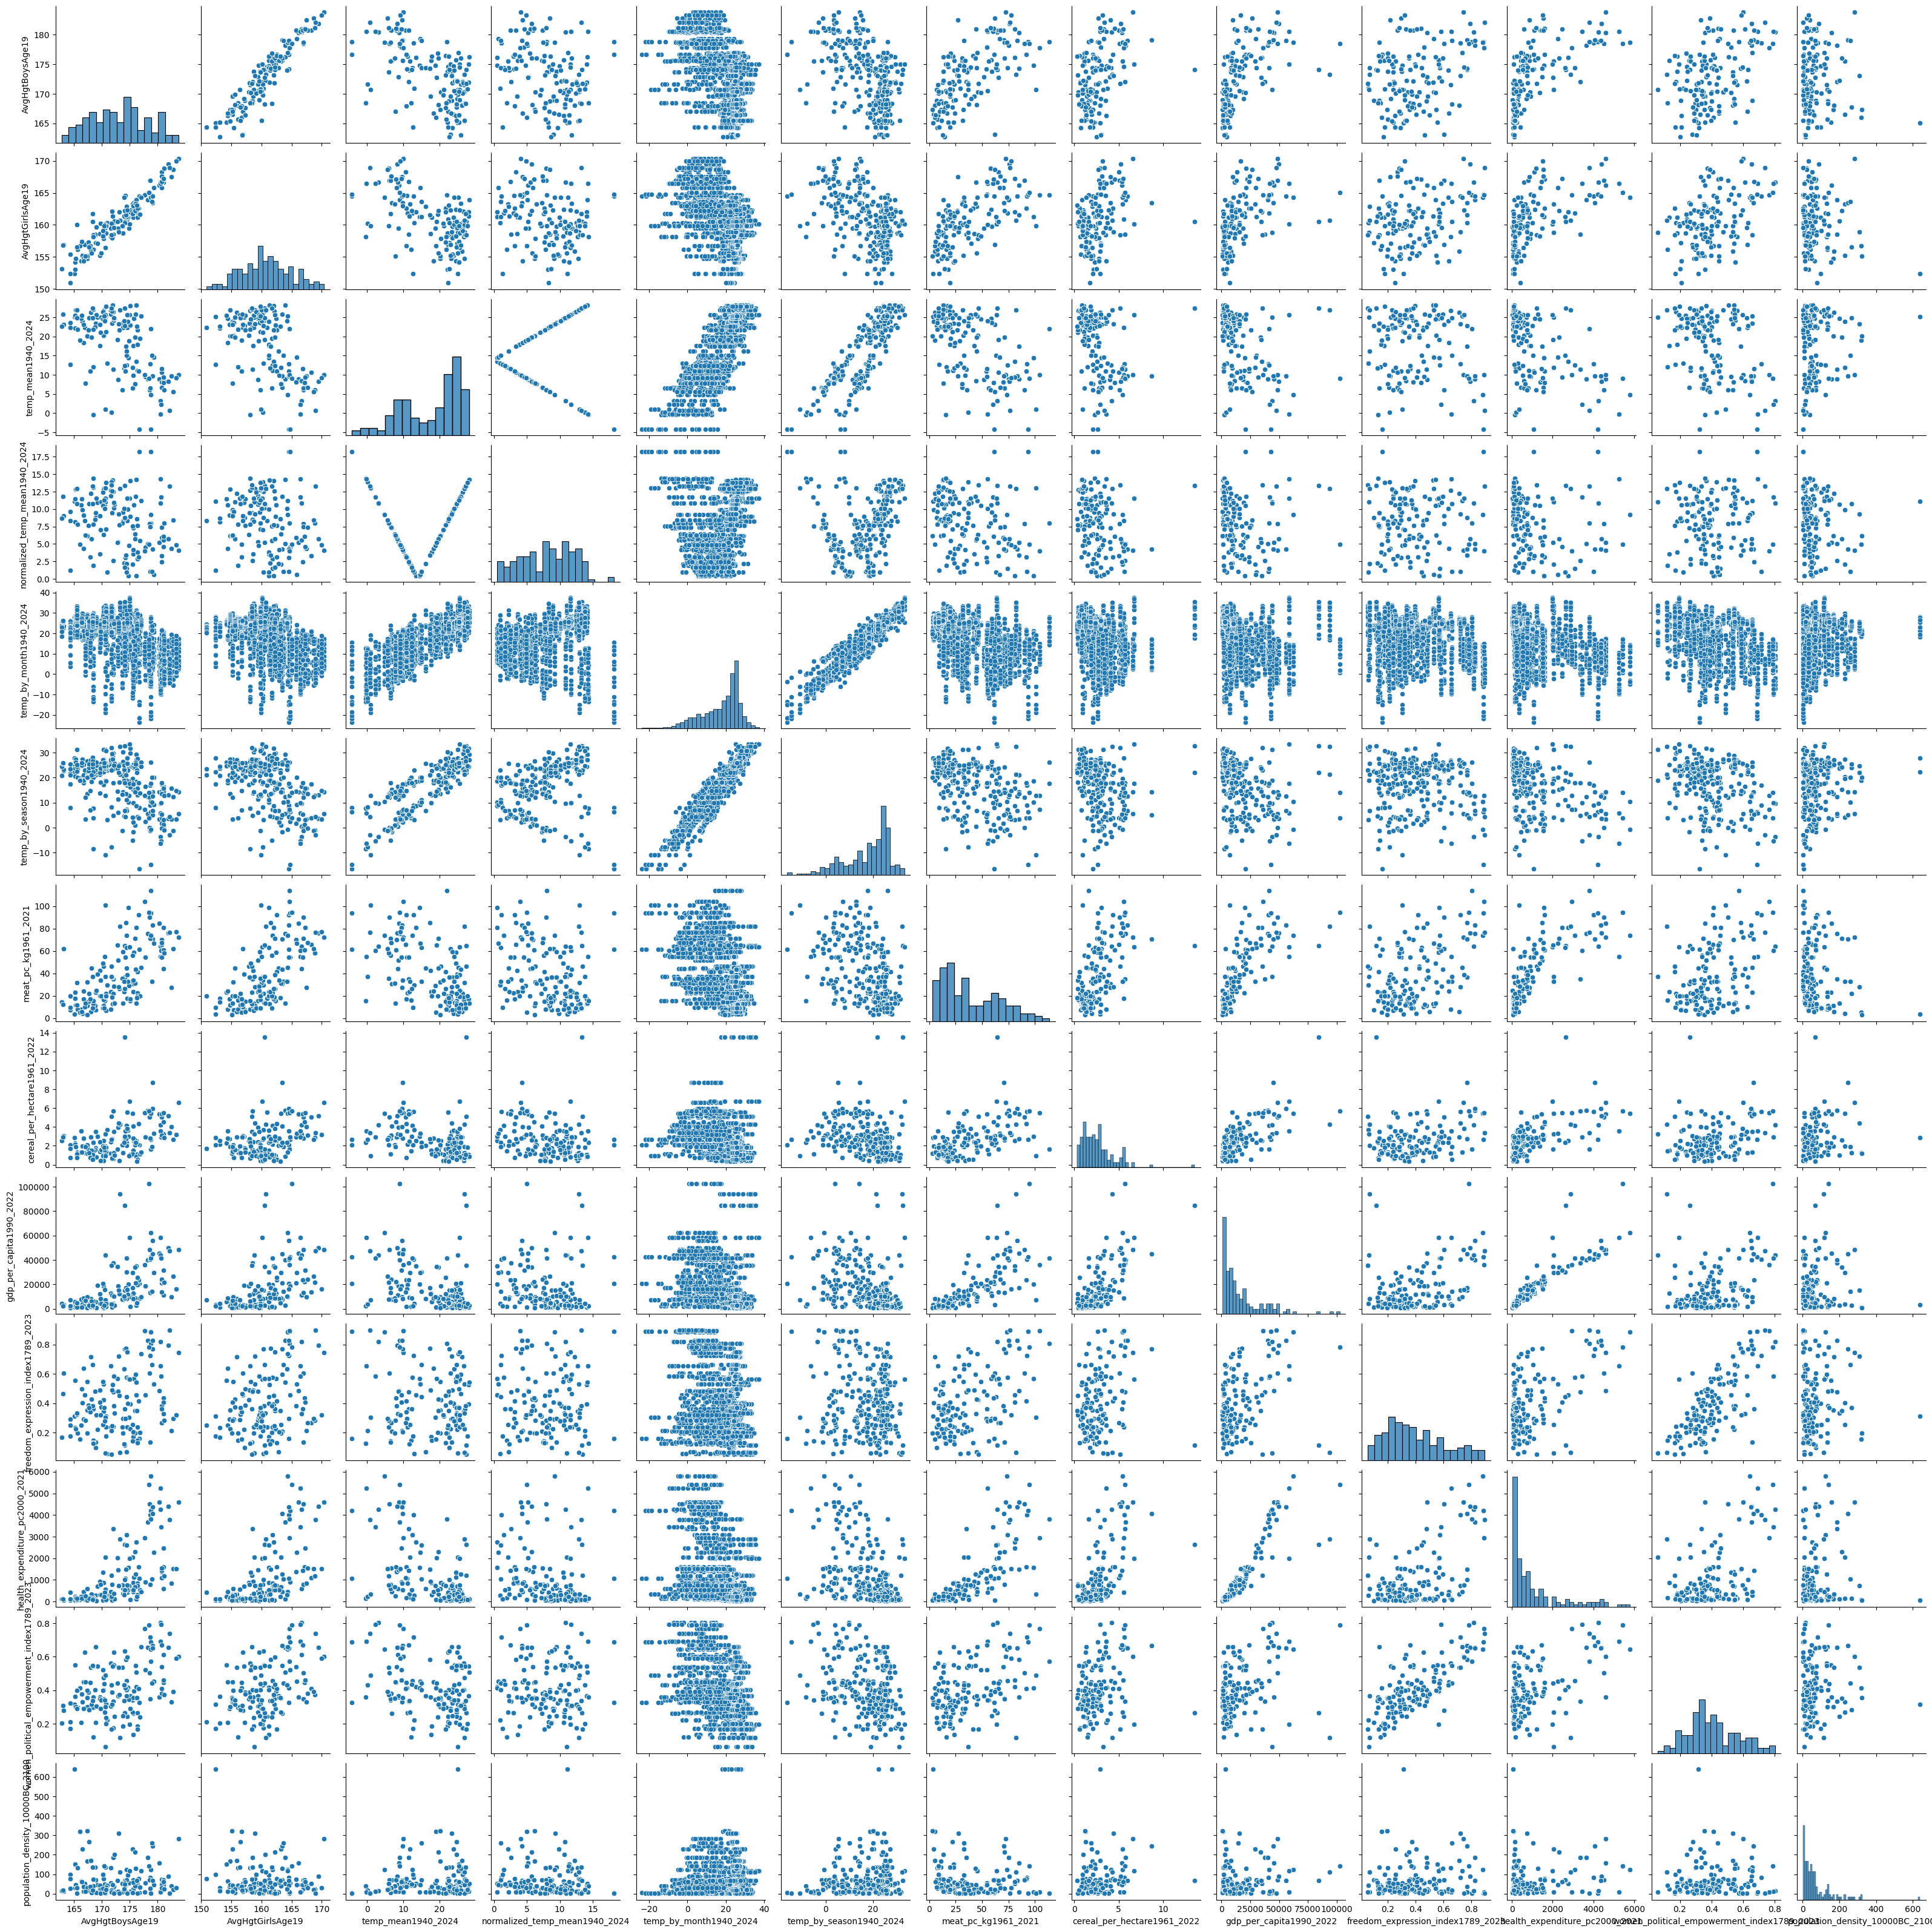

In [226]:
# Visualizing the possible relationships among the variables
pairplot_ds = height_tempMeanNormMonthSeason_meat_crop_freedom_health_women_populationDensity_ds[['AvgHgtBoysAge19', 'AvgHgtGirlsAge19', 'temp_mean1940_2024',
       'normalized_temp_mean1940_2024', 'temp_by_month1940_2024', 'temp_by_season1940_2024',
       'meat_pc_kg1961_2021', 'cereal_per_hectare1961_2022',
       'gdp_per_capita1990_2022', 'freedom_expression_index1789_2023',
       'health_expenditure_pc2000_2021', 'women_political_empowerment_index1789_2023', 'population_density_10000BC_2100']].dropna()

sns.pairplot(pairplot_ds)

In [232]:
# Calculating the variance inflation factor to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = pairplot_ds
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = zip(X, vif)
print(list(vif))

[('AvgHgtBoysAge19', 11740.552577774566), ('AvgHgtGirlsAge19', 11891.631077714519), ('temp_mean1940_2024', 28.969303610893444), ('normalized_temp_mean1940_2024', 7.141181362865899), ('temp_by_month1940_2024', 48.08180606083327), ('temp_by_season1940_2024', 64.3402743531856), ('meat_pc_kg1961_2021', 10.83366713896665), ('cereal_per_hectare1961_2022', 6.93540059580721), ('gdp_per_capita1990_2022', 15.811563679462406), ('freedom_expression_index1789_2023', 16.306757130440428), ('health_expenditure_pc2000_2021', 17.393656074142456), ('women_political_empowerment_index1789_2023', 22.232683570622576), ('population_density_10000BC_2100', 2.1143540651040507)]


In [233]:
# Exporting the final dataset to drive
height_tempMeanNormMonthSeason_meat_crop_freedom_health_women_populationDensity_ds.to_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/complete_height_vs_temperature_plus_other_variables_ds.csv')

In [ ]:
# Start working on backward elimination multilinear model